In [1]:
import pickle
import matplotlib.pyplot as plt

from utils import *
from multi_threading import read_all_images, parallel_frame_sum
from plotting import plot_SUM_or_RMS
# from typing import Any, TypedDict

In [2]:
configs:configDict = dict(debugging=True, 
                  pickle_usage=True, 
                  tiff_amount_cutoff=None
                  )

In [3]:
@timer_decorator(configs)
def get_frame_sum(tiff_path:str, configs:configDict) -> list[np.array]:
    """
    parameters:
        - `tiff_path`(str): The path to the tiff files.

        - `configs`(TypedDict):
            - `debugging`(bool): Whether debugging is enabled.
            - `pickle_usage`(bool): Use Pickle or not. Default to be True.
            - `tiff_amount_cutoff`(int): The amount of tiff files to be read. Default to be None, read all files.
    """
    debugging = configs['debugging']
    pickle_usage = configs['pickle_usage']

    image_arrays = read_all_images(tiff_path, configs)
    if debugging==True and pickle_usage==False:
        print('NOT USING PICKLE')
    if debugging==True:
        print(f'{np.size(image_arrays)} is the size of image_arrays')

    if os.path.exists(f'{tiff_path}\\frame_sum_array.pkl') and pickle_usage==True:
        with open(f'{tiff_path}\\frame_sum_array.pkl', 'rb') as f:
            frame_sum_array:list[int] = pickle.load(f)
        print('Loaded frame_sum_array.pkl')

    else:
        frame_sum_array = parallel_frame_sum(image_arrays)

        if pickle_usage==True:
            with open(f'{tiff_path}\\frame_sum_array.pkl', 'wb') as f:
                pickle.dump(frame_sum_array, f)

    return frame_sum_array

C:\LABDATA_office\4.1\background
Loaded image_arrays.pkl
50 is the size of image_arrays
Loaded frame_sum_array.pkl
Function   get_frame_sum() took 0.1 seconds to run.
C:\LABDATA_office\4.1\data
Loaded image_arrays.pkl
200 is the size of image_arrays
Loaded frame_sum_array.pkl
Function   get_frame_sum() took 0.3 seconds to run.
frame_SUM_std_percent = 12.2%
['Exposure time: 63 ms, Bit rate: 16 bits, Dimension: 724x724, frames: 200\n', 724, 724, 63]


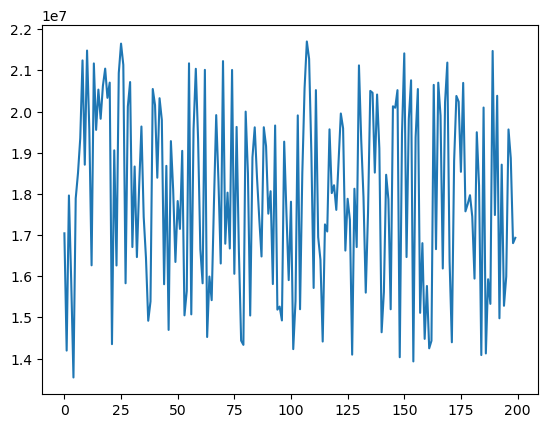

In [4]:
tiff_main_folder:str = 'C:\\LABDATA_office\\4.1'
tiff_path:str = tiff_main_folder + '\\background'

background_frame_SUM_array = get_frame_sum(tiff_path, configs)
average_background = np.average(background_frame_SUM_array)

tiff_path = tiff_main_folder + '\\data'
frame_SUM_array = get_frame_sum(tiff_path, configs)

pure_frame_SUM_array = frame_SUM_array - average_background

frame_SUM_std = np.std(pure_frame_SUM_array)
frame_SUM_std_percent = frame_SUM_std/np.average(pure_frame_SUM_array)

print(f'frame_SUM_std_percent = {frame_SUM_std_percent*100:.1f}%')

tags = get_tags_from_first_tiff(tiff_path)
print(tags)
plt.plot(pure_frame_SUM_array)
plt.show()

#### Heat maps for individual tiff

In [9]:
def convert_individual_tiff_dense(tiff_path:str, 
                                  configs:configDict, 
                                  tiff_amount_cutoff=-1) -> list[np.ndarray]:
    configs_copy = configs.copy()
    if tiff_amount_cutoff != -1:
        configs_copy['tiff_amount_cutoff'] = tiff_amount_cutoff

    image_arrays_csr = read_all_images(tiff_path, configs_copy)
    
    image_arrays_dense = [tiff.toarray() for tiff in image_arrays_csr]

    return image_arrays_dense

C:\LABDATA_office\4.1\data
Loaded image_arrays.pkl


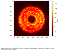

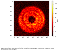

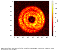

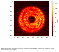

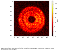

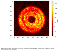

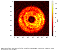

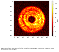

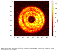

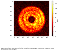

In [11]:
tiff_main_folder = 'C:\\LABDATA_office\\4.1'
tiff_path = tiff_main_folder + '\\data'
del tiff_main_folder

image_arrays_dense = convert_individual_tiff_dense(tiff_path, configs, tiff_amount_cutoff=10)

plot_configs:plotDict = dict(array_type = 'individual', 
                            bin_amount = 200, 
                            heatmap_max = 150, 
                            dpi = 10, 
                            save = True
                            )

for individual_tiff in image_arrays_dense:
    plot_SUM_or_RMS(individual_tiff, tiff_path, configs, plot_configs, 'heat')